<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/Convnet_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import load_model
model = load_model('./cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [3]:
import os 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!unzip -uq '/content/drive/MyDrive/cats_and_dogs_small.zip' -d '/content/drive/MyDrive/catsdogs'

In [17]:
img_path = '/content/drive/MyDrive/catsdogs/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor= np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


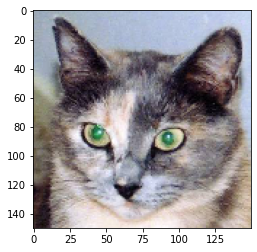

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [20]:
from keras import models

layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations=activation_model.predict(img_tensor)
first_layer_activation = activations[0]

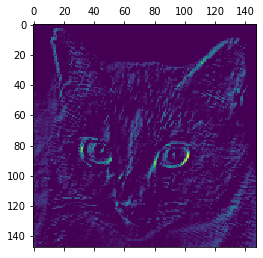

In [21]:
# 첫번째 층 활성화 중 20번째 채널 시각화
plt.matshow(first_layer_activation[0,:,:,19], cmap='viridis')

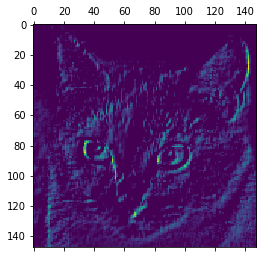

In [22]:
# 첫번째 층 활성화 중 16번째 채널 시각화
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

## 중간층 모든 활성화 채널 시각화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


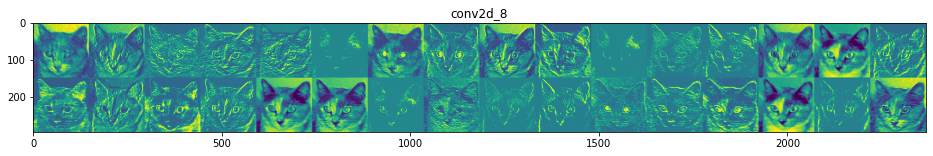

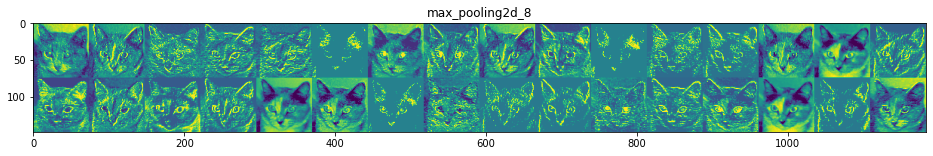

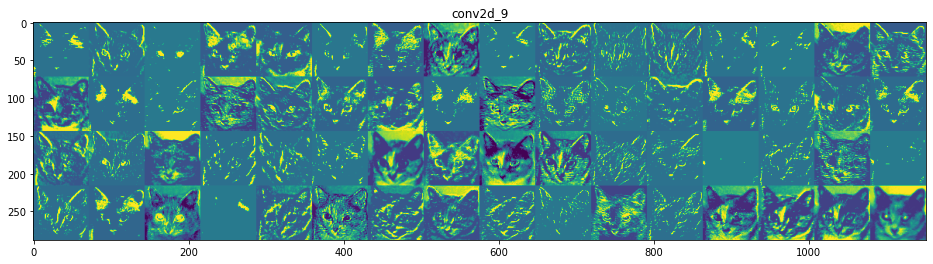

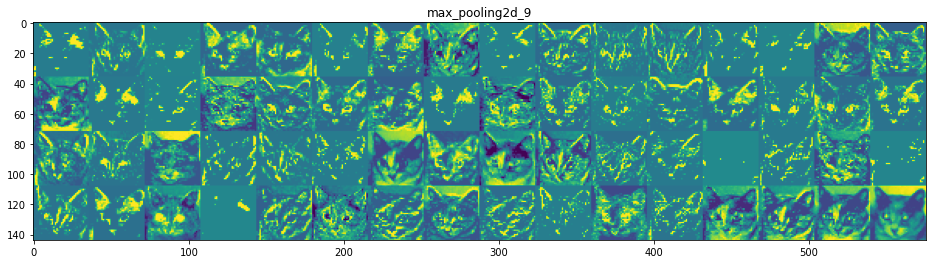

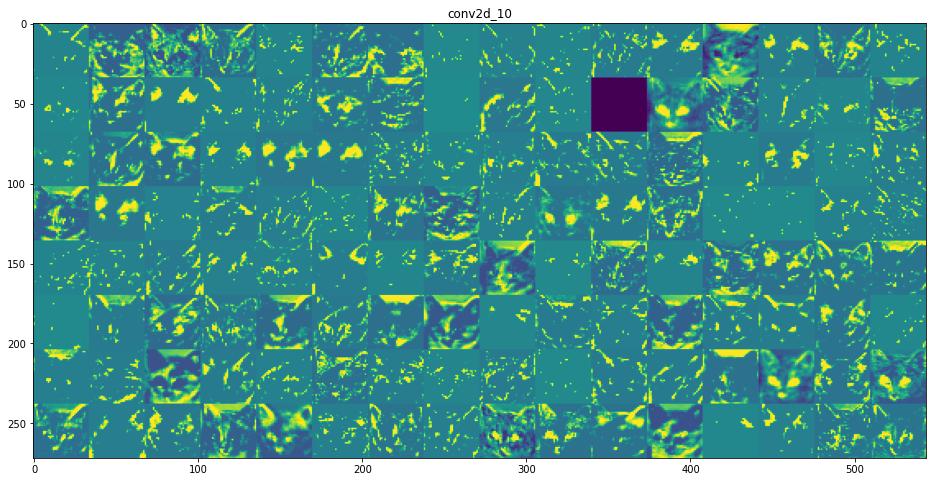

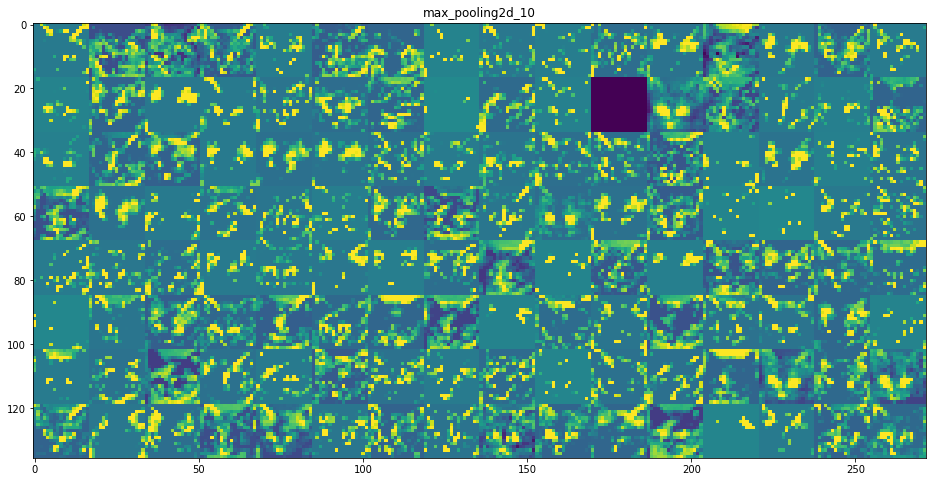

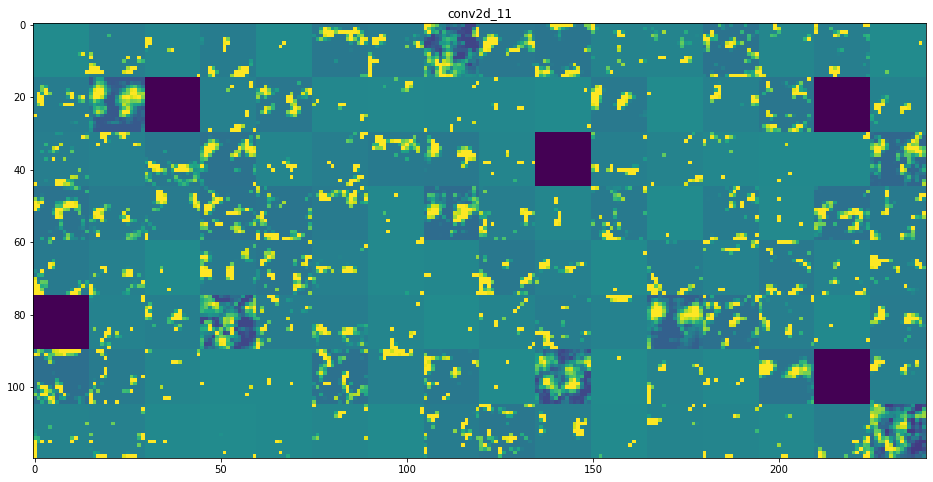

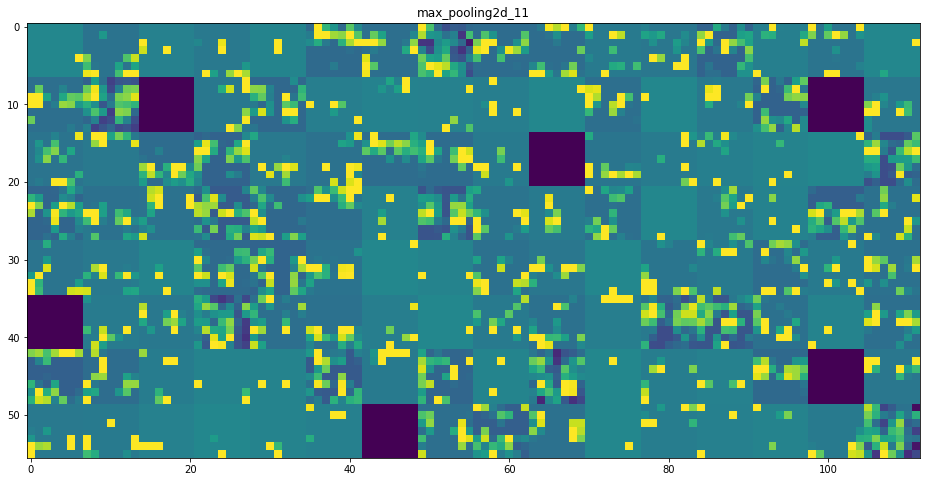

In [23]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row] 
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) 
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [25]:
from tensorflow.keras.applications import VGG16 
from tensorflow.keras import backend as K
model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output 
loss = K.mean(layer_output[:, :, :, filter_index])

58900480/58889256 [==============================] - 0s 0us/step
